<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg" align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;"><a href="http://www.editorialuoc.cat/mineria-de-datos" target="_blank">Minería de datos: Modelos y algoritmos</a></p>
<p style="margin: 0; text-align:right;">Estudios de Informática, Multimedia y Telecomunicación</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Universitat Oberta de Catalunya (<b>UOC</b>)</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>

# CH15EJ2 *Boosting*

En este ejemplo se muestra como generar un clasificador arbol de decisión y como mejorarlo con la técnica de *boosting*. Trabajaremos con el paquete R neuralnet y con el juego de datos [Breast Cancer Wisconsin (Diagnostic) Data Set](https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28diagnostic%29).

## 1. Instalar los packages necesarios

Para empezar, cargamos todos los paquetes que van a ser utilizados a lo largo del ejercicio.

In [1]:
if(!require(cart)){
    install.packages('cart',repos='http://cran.es.r-project.org')
    require(cart)
}
if(!require(caret)){
    install.packages('caret',repos='http://cran.es.r-project.org')
    require(caret)
}
if(!require(C50)){
    install.packages('C50',repos='http://cran.es.r-project.org')
    require(C50)
}
if(!require(car)){
    install.packages('car',repos='http://cran.es.r-project.org')
    require(car)
}
if(!require(plyr)){
    install.packages('plyr',repos='http://cran.es.r-project.org')
    require(plyr)
}
set.seed(17)

Loading required package: cart

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘cart’”
Installing package into ‘/home/xavier/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)

Warning message:
“package ‘cart’ is not available (for R version 3.6.3)”
Loading required package: cart

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘cart’”
Loading required package: caret

Loading required package: lattice

Loading required package: ggplot2

Loading required package: C50

Loading required package: car

Loading required package: carData

Loading required package: plyr



## 2. Manipulación y preparación de los datos

Leemos el fichero de datos y vemos que consiste en 11 variables, y en la documentación vemos que estas corresponden a:

- 1: Identificador de la muestra
- 2-10: Diferentes medidas del tamaño y forma del núcleo de las células
- 11: Diagnóstico (2 = benogno, 4 = maligno)

In [2]:
wdbc <- read.table(
    url("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"), 
    sep=",",
    header=FALSE
)

dim(wdbc)
head(wdbc)

[1] 699  11

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<int>,<int>,<int>,<int>
1,1000025,5,1,1,1,2,1,3,1,1,2
2,1002945,5,4,4,5,7,10,3,2,1,2
3,1015425,3,1,1,1,2,2,3,1,1,2
4,1016277,6,8,8,1,3,4,3,7,1,2
5,1017023,4,1,1,3,2,1,3,1,1,2
6,1017122,8,10,10,8,7,10,9,7,1,4


### Preparación de los datos

1. Sustituimos los valores ? por NA

In [3]:
wdbc$V7=as.numeric(recode(wdbc$V7, "'?'=NA"))

2. Eliminamos los registros con datos incompletos

In [4]:
wdbc <- wdbc[complete.cases(wdbc),]

In [5]:
dataset <- wdbc[, 2:11]

## 3. Creación del modelo

### Parámetros de creación del modelo

Definimos un cross validation con 3 repeticiones y 10 folds.

In [6]:
control <- trainControl(method="repeatedcv", number=10, repeats=3, savePredictions = TRUE)

### Creamos un modelo de árbol con el método de *boosting*

La métrica que usaremos para la evaluación del modelo será `Accuracy`.

In [7]:
grid <- expand.grid(.winnow = c(FALSE), .trials=c(1,5,10,15,25,50,75,100), .model="tree")

In [8]:
model.boost <- train(
    as.factor(V11)~.,
    tuneGrid=grid,
    data=dataset,
    method="C5.0",
    metric="Accuracy",
    trControl=control
)

### Matriz de confusión

In [9]:
confusionMatrix(model.boost)

Cross-Validated (10 fold, repeated 3 times) Confusion Matrix 

(entries are percentual average cell counts across resamples)
 
          Reference
Prediction  2  4
         2 63  1
         4  2 34
                            
 Accuracy (average) : 0.9697


###  Mostramos las características del modelo

In [10]:
print(model.boost)

C5.0 

683 samples
  9 predictor
  2 classes: '2', '4' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 615, 614, 615, 615, 614, 615, ... 
Resampling results across tuning parameters:

  trials  Accuracy   Kappa    
    1     0.9565343  0.9045634
    5     0.9595116  0.9112640
   10     0.9633617  0.9198091
   15     0.9653515  0.9241618
   25     0.9682929  0.9307105
   50     0.9697207  0.9341371
   75     0.9697278  0.9341589
  100     0.9697205  0.9340644

Tuning parameter 'model' was held constant at a value of tree
Tuning
 parameter 'winnow' was held constant at a value of FALSE
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were trials = 75, model = tree and winnow
 = FALSE.


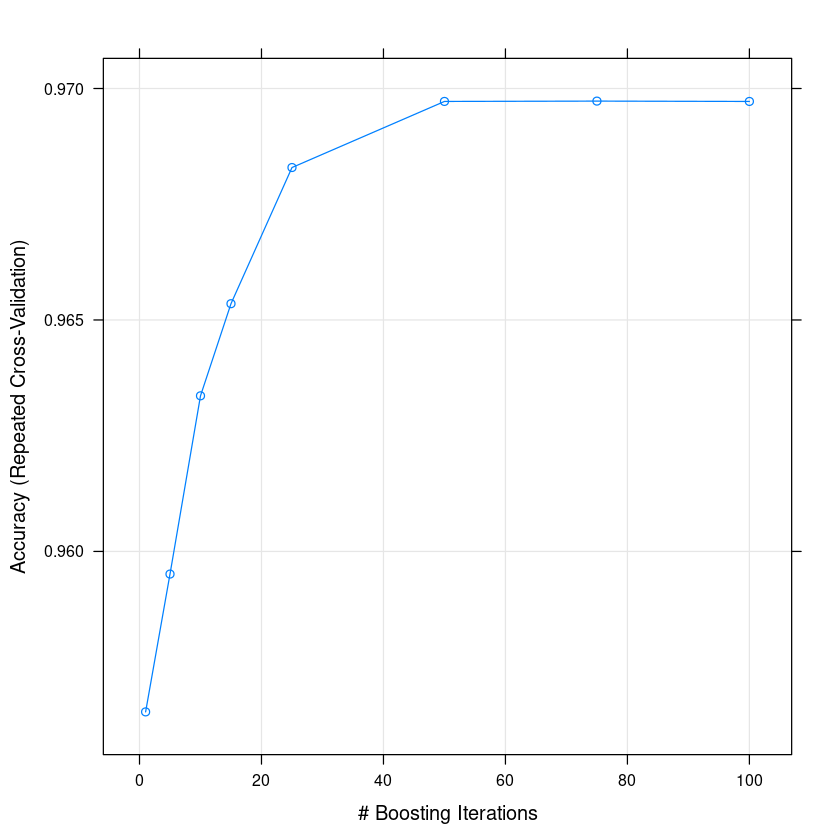

In [11]:
plot(model.boost)